![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [ ]:
my_folder = "/content/drive/MyDrive/RetoSAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/RetoSAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [ ]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.7.15


In [ ]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [ ]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [ ]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [ ]:
# %%writefile .authinfo
# oda user correoinstituchional password contraseñahacker

Copy this file to home

In [ ]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [ ]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/RetoSAS/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 547



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/RetoSAS/sascfg_personal.py
WORK Path             = /saswork/SAS_workF3CB0000F9C3_odaws01-usw2-2.oda.sas.com/SAS_work71A90000F9C3_odaws01-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.0
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 63939


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [ ]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                   Wednesday, November 30, 2022 02:10:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                   Wednesday, November 30, 2022 02:10:00 AM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [ ]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

## Merge the Data

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
832018,2832019.0,CRUZ,BETTY,1.0,72.0,19900.0,University / College,City,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,25.0
665637,2665638.0,ROBINSON,JOSE,0.0,46.0,11500.0,High School,Suburban,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,30.0
909199,2909200.0,CORDARO,NERISSA,1.0,20.0,14600.0,University / College,Rural,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
961799,2961800.0,FISHER,GLEN,0.0,19.0,3600.0,University / College,City,4.0,0.0,...,4.0,1.0,4.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0
706380,2706381.0,MCLAUGHLIN,NINA,1.0,35.0,16100.0,University / College,Suburban,6.0,4.0,...,1.0,1.0,1.0,25.0,25.0,25.0,0.0,0.0,1.0,150.0


In [ ]:
data_merge.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.122232,7.741080
std,2.886753e+05,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.327554,83.110552
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+06,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,2.750000e+06,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,10000.000000


In [ ]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

## Data Analysis

In [ ]:
cualitativas = ["Woman", "Education", "City","SeniorList","GaveLastYear","GaveThisYear"]
cuantitativas = ["Age", "Salary", "NbActivities", "Referrals", "Recency", "Frequency", "Seniority", "TotalGift", "MinGift", "MaxGift","AmtLastYear","AmtThisYear"]
cuantitativas_sin_y = ["Age", "Salary", "NbActivities", "Referrals", "Recency", "Frequency", "Seniority", "TotalGift", "MinGift", "MaxGift","AmtLastYear"]

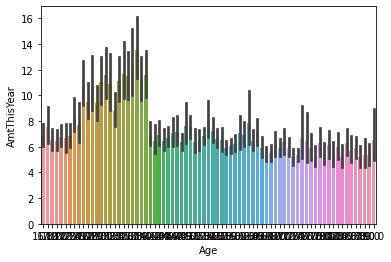

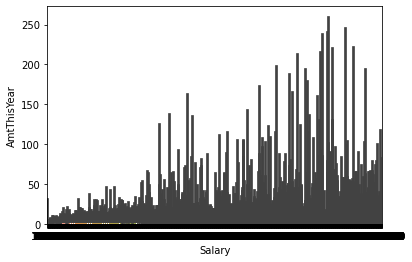

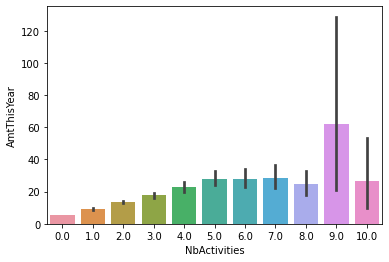

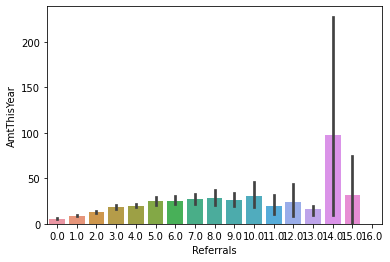

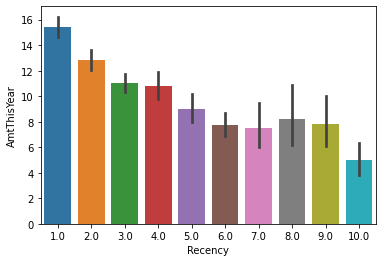

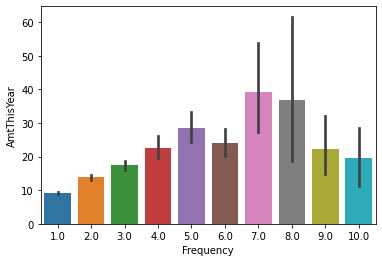

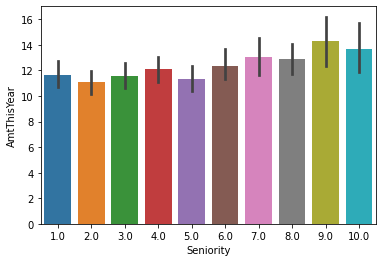

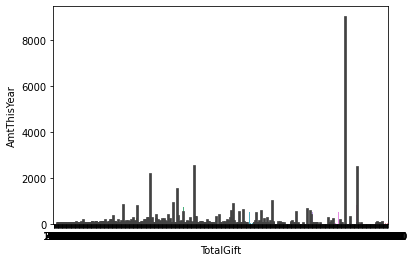

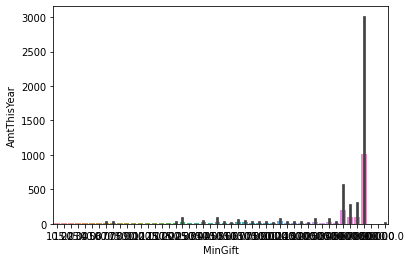

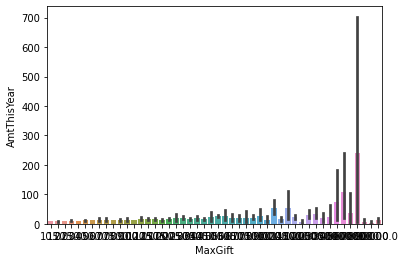

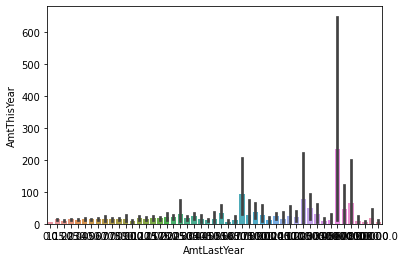

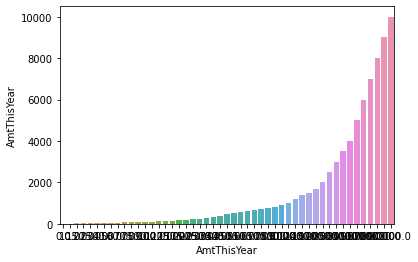

In [ ]:
df = data_merge

for i,el in enumerate(cuantitativas):
    sns.barplot(x = df[el], y = df["AmtThisYear"])
    plt.show()

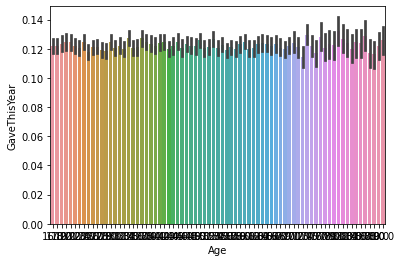

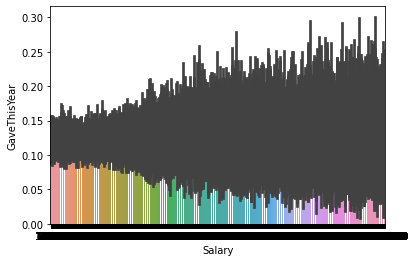

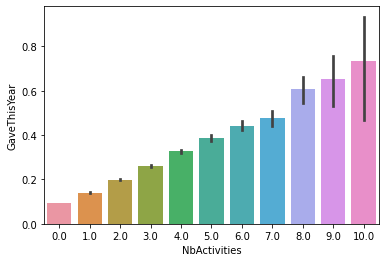

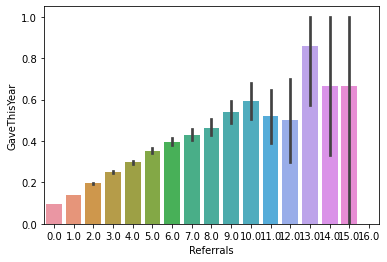

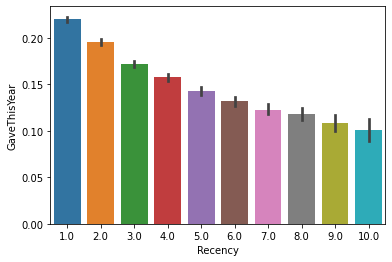

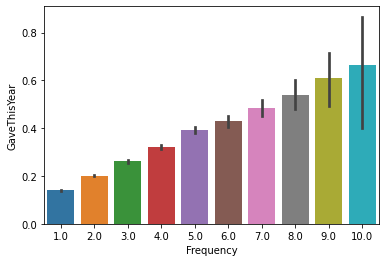

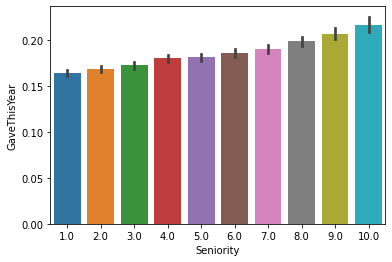

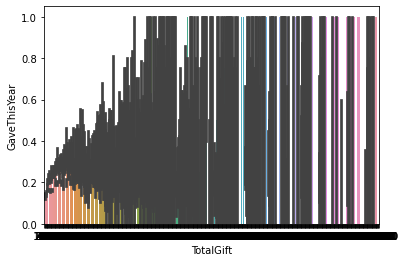

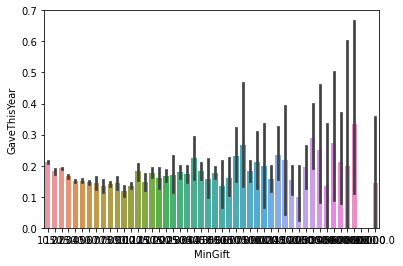

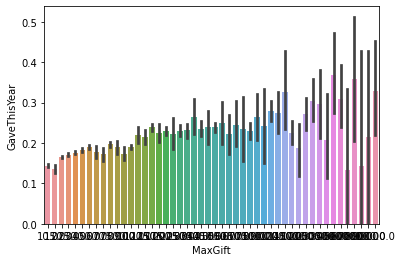

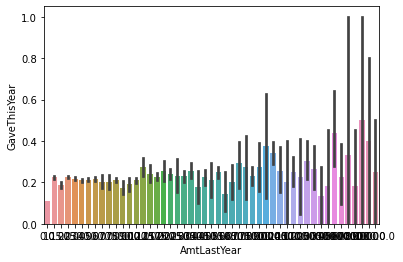

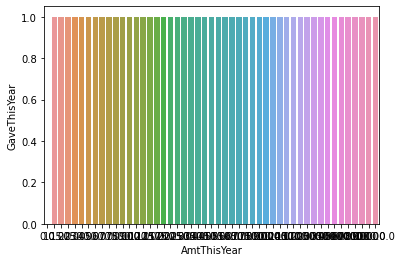

In [ ]:
for i,el in enumerate(cuantitativas):
    sns.barplot(x = df[el], y = df["GaveThisYear"])
    plt.show()

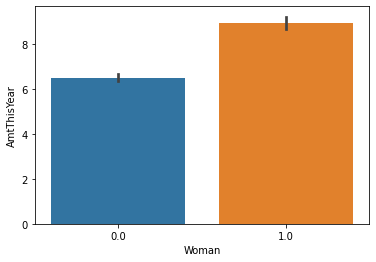

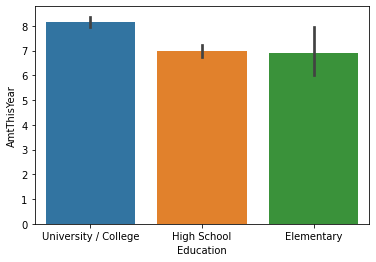

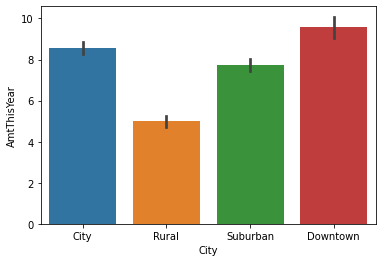

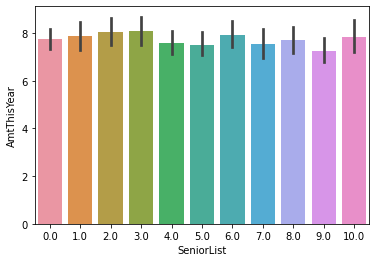

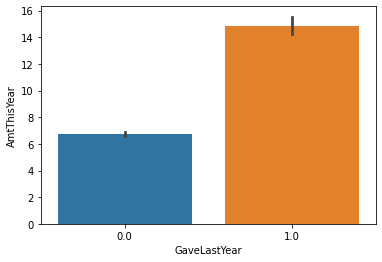

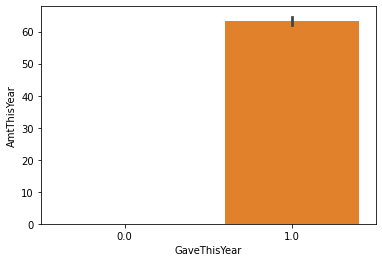

In [ ]:
for i,el in enumerate(cualitativas):
    sns.barplot(x = df[el], y = df["AmtThisYear"])
    plt.show()

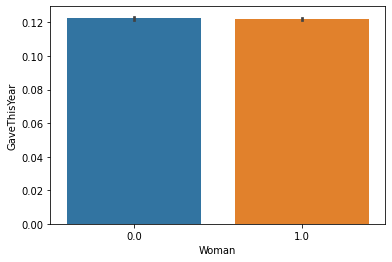

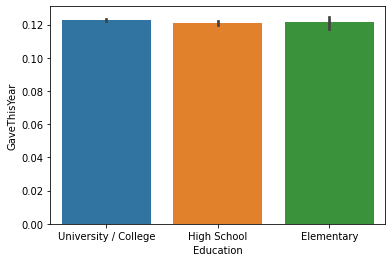

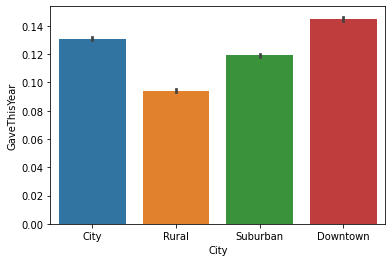

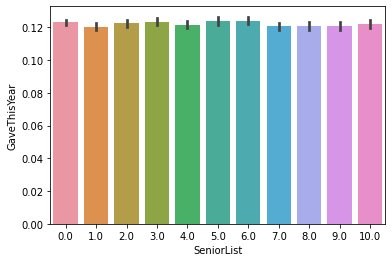

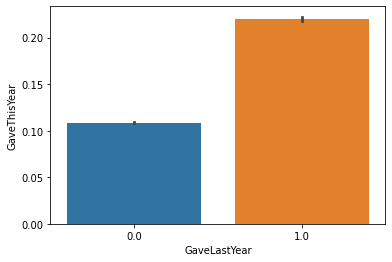

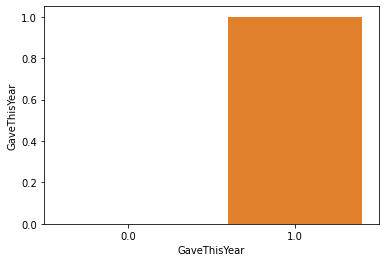

In [ ]:
for i,el in enumerate(cualitativas):
    sns.barplot(x = df[el], y = df["GaveThisYear"])
    plt.show()

## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


In [ ]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.
def deal_missing_values(data): 
  contarLastYear = True

  if contarLastYear:
    # MinGift
    data.loc[data["GaveLastYear"] == 1 & (data["AmtLastYear"] < data["MinGift"]), "MinGift"] = data["AmtLastYear"]
    # data.loc[(data["GaveLastYear"] == 1) & (np.isnan(data["MinGift"])), "MinGift"] = data.loc[(data["GaveLastYear"] == 1) & (np.isnan(data["MinGift"])),"AmtLastYear"]
    data.loc[(data["GaveLastYear"] == 1) & (np.isnan(data["MinGift"])), "MinGift"] = data["AmtLastYear"]
    data[['MinGift']] = data[['MinGift']].fillna(value=0)

    # Recency
    data.loc[data["GaveLastYear"] == 0,"Recency"] += 1
    data.loc[np.isnan(data["Recency"]) & (data["GaveLastYear"] == 0),"Recency"] = 12.0
    data.loc[data["GaveLastYear"] == 1,"Recency"] = 1.0

    # Frequency CAMBIAR, sería 2 veces, no una, creo, tengo que ver si sí refleja la realidad
    data.loc[data["GaveLastYear"] == 1,"Frequency"] += 1
    data.loc[np.isnan(data["Frequency"]) & (data["GaveLastYear"] == 1),"Frequency"] = 1
    data[['Frequency']] = data[['Frequency']].fillna(value=0)

    # Seniority CAMBIAR creo que sí se puede deducir
    data[['Seniority']] = data[['Seniority']].fillna(round(data['Seniority'].mean()))

    # TotalGift
    data.loc[data["GaveLastYear"] == 1,"TotalGift"] += data["AmtLastYear"]
    data.loc[np.isnan(data["TotalGift"]) & (data["GaveLastYear"] == 1),"TotalGift"] = data["AmtLastYear"]
    data[['TotalGift']] = data[['TotalGift']].fillna(value=0)

    # MaxGift
    data.loc[data["GaveLastYear"] == 1 & (data["AmtLastYear"] > data["MaxGift"]), "MaxGift"] = data["AmtLastYear"]
    # data.loc[(data["GaveLastYear"] == 1) & (np.isnan(data["MaxGift"])), "MaxGift"] = data.loc[(data["GaveLastYear"] == 1) & (np.isnan(data["MaxGift"])),"AmtLastYear"]
    data.loc[(data["GaveLastYear"] == 1) & (np.isnan(data["MaxGift"])), "MaxGift"] = data["AmtLastYear"]
    data[['MaxGift']] = data[['MaxGift']].fillna(value=0)

  else:

    #Sin Contar LastYear
    data[['MinGift']] = data[['MinGift']].fillna(value=0)
    data[['Recency']] = data[['Recency']].fillna(value=0)
    data[['Frequency']] = data[['Frequency']].fillna(value=0)
    data[['Seniority']] = data[['Seniority']].fillna(value=0)
    data[['TotalGift']] = data[['TotalGift']].fillna(value=0)
    data[['MaxGift']] = data[['MaxGift']].fillna(value=0)

  return data

# data.sample(3)

## Data standardize

In [ ]:
from sklearn.preprocessing import StandardScaler

def standardize_data(data): 
  scaler = StandardScaler()
  scaler.fit(data[cuantitativas_sin_y])
  transformed = scaler.transform(data[cuantitativas_sin_y])

  data[cuantitativas_sin_y] =  pd.DataFrame(transformed, columns = data[cuantitativas_sin_y].columns)

  return data
# data.head(10)

## One Hot Encoding

In [ ]:
def one_hot_function(data): 

  data = pd.get_dummies(data, columns = ['Education', 'City'])
  return data

In [ ]:
data_merge = deal_missing_values(data_merge)
data_merge.tail()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
999995,2999996.0,SCHUBERT,FRANCES,1.0,29.0,15100.0,High School,Suburban,8.0,3.0,...,6.0,1.0,5.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0
999996,2999997.0,LUGGE,MARY,1.0,22.0,7000.0,High School,Suburban,10.0,0.0,...,12.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999997,2999998.0,ROY,REGINALD,0.0,17.0,1000.0,High School,City,10.0,1.0,...,2.0,1.0,1.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0
999998,2999999.0,LIBERTI,PAMELA,1.0,32.0,43900.0,University / College,Rural,0.0,0.0,...,12.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999999,3000000.0,BELL,SYBIL,1.0,50.0,52400.0,University / College,Suburban,4.0,0.0,...,12.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_merge = standardize_data(data_merge)
data_merge.tail(10)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
999990,2999991.0,COSTANZO,KATHY,1.0,0.930775,1.041232,High School,Suburban,3.0,-0.563214,...,-1.642039,0.288302,-0.105083,-0.112467,0.030015,0.067855,1.0,0.149918,0.0,0.0
999991,2999992.0,SCOGGIN,GERALD,0.0,1.141909,-0.853902,High School,City,0.0,-0.563214,...,0.770124,-0.620394,-0.105083,-0.211103,-0.168130,-0.106515,0.0,-0.093318,0.0,0.0
999992,2999993.0,WEITZEL,LIZA,1.0,0.297373,0.572772,University / College,Suburban,2.0,-0.563214,...,0.770124,-0.620394,-0.105083,-0.211103,-0.168130,-0.106515,0.0,-0.093318,0.0,0.0
999993,2999994.0,CLARE,MELINDA,1.0,-0.599946,-0.598378,High School,Suburban,10.0,-0.563214,...,0.770124,-0.620394,-0.105083,-0.211103,-0.168130,-0.106515,0.0,-0.093318,0.0,0.0
999994,2999995.0,WHITE,RICHARD,0.0,1.141909,-0.806401,High School,City,8.0,-0.563214,...,0.770124,-0.620394,-0.105083,-0.211103,-0.168130,-0.106515,0.0,-0.093318,0.0,0.0
999995,2999996.0,SCHUBERT,FRANCES,1.0,-0.916647,-0.826057,High School,Suburban,8.0,2.446410,...,-0.545601,0.288302,0.553859,-0.112467,0.030015,-0.106515,0.0,-0.093318,0.0,0.0
999996,2999997.0,LUGGE,MARY,1.0,-1.286132,-0.958732,High School,Suburban,10.0,-0.563214,...,0.770124,-0.620394,-0.105083,-0.211103,-0.168130,-0.106515,0.0,-0.093318,0.0,0.0
999997,2999998.0,ROY,REGINALD,0.0,-1.550049,-1.057011,High School,City,10.0,0.439994,...,-1.422751,0.288302,-2.081909,-0.112467,0.030015,-0.106515,0.0,-0.093318,0.0,0.0
999998,2999999.0,LIBERTI,PAMELA,1.0,-0.758297,-0.354321,University / College,Rural,0.0,-0.563214,...,0.770124,-0.620394,-0.105083,-0.211103,-0.168130,-0.106515,0.0,-0.093318,0.0,0.0
999999,3000000.0,BELL,SYBIL,1.0,0.191806,-0.215093,University / College,Suburban,4.0,-0.563214,...,0.770124,-0.620394,-0.105083,-0.211103,-0.168130,-0.106515,0.0,-0.093318,0.0,0.0


In [ ]:
data_merge = one_hot_function(data_merge)
data_merge.head(5)

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,AmtLastYear,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,ROMMES,RODNEY,0.0,-1.127781,0.682516,2.0,-0.563214,-0.531824,-1.422751,...,-0.093318,0.0,0.0,0,0,1,1,0,0,0
1,2000002.0,RAMIREZ,SHARON,1.0,-0.441596,-0.814591,4.0,0.439994,0.416919,0.770124,...,-0.093318,0.0,0.0,0,1,0,0,0,1,0
2,2000003.0,TSOSIE,KAREN,1.0,-0.494379,-0.133194,5.0,-0.563214,-0.531824,0.770124,...,-0.093318,0.0,0.0,0,0,1,0,0,1,0
3,2000004.0,LEE,MARY,1.0,1.669744,-0.685191,3.0,-0.563214,-0.531824,0.770124,...,-0.093318,0.0,0.0,0,1,0,0,0,1,0
4,2000005.0,HUMPHRES,ANGIE,1.0,-0.652730,0.104312,8.0,-0.563214,-0.531824,0.770124,...,-0.093318,0.0,0.0,0,0,1,0,0,1,0


In [ ]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ID                              1000000 non-null  float64
 1   LastName                        999977 non-null   object 
 2   FirstName                       999996 non-null   object 
 3   Woman                           1000000 non-null  float64
 4   Age                             1000000 non-null  float64
 5   Salary                          1000000 non-null  float64
 6   SeniorList                      1000000 non-null  float64
 7   NbActivities                    1000000 non-null  float64
 8   Referrals                       1000000 non-null  float64
 9   Recency                         1000000 non-null  float64
 10  Frequency                       1000000 non-null  float64
 11  Seniority                       1000000 non-null  float64
 12  T

## Data Partition

In [ ]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.2, random_state=12345) 

train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,AmtLastYear,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
679768,2679769.0,JORDAN,MAGDALENA,1.0,-0.494379,0.273023,1.0,-0.563214,-0.531824,0.770124,...,-0.093318,0.0,0.0,0,0,1,1,0,0,0
611459,2611460.0,CRAWFORD,JOEANN,1.0,-0.124895,1.462191,1.0,0.439994,0.416919,0.770124,...,-0.093318,0.0,0.0,0,1,0,1,0,0,0


## Prebuilt Models
***

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.


In [ ]:
from sklearn import linear_model
dummies_name = ['Education_Elementary', 'Education_High School', 'Education_University / College', 'City_City', 'City_Downtown', 'City_Rural', 'City_Suburban']
train_columns = ['Age', 'Salary','MinGift','TotalGift', 'GaveLastYear', 'AmtLastYear','Woman', 'Frequency', 'NbActivities'] + dummies_name 
#comment: it's numpy array
X_train = train[train_columns] 
Y_train = train['AmtThisYear']
X_valid = validation[train_columns] 
Y_valid = validation['AmtThisYear']

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [ ]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

13.172941932296917
7725.083843528719
87.89245612411067


## **Regression Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_train = train[train_columns] 
Y_train = train['AmtThisYear']
X_valid = validation[train_columns] 
Y_valid = validation['AmtThisYear']

DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

13.246204986446951
7727.935302238072
87.90867592131093


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train,Y_train)

xgb_predict = xgb_model.predict(X_valid)

[06:19:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#MAE
print(metrics.mean_absolute_error(Y_valid,xgb_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,xgb_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,xgb_predict)))

13.221210259863586
7729.601705445292
87.91815344651691


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada_reg = AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=42) 

ada_reg.fit(X_train,Y_train)

ada_reg_predict = ada_reg.predict(X_valid)

In [ ]:
#MAE
print(metrics.mean_absolute_error(Y_valid,ada_reg_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,ada_reg_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,ada_reg_predict)))

75.38583425889972
22705.480341856437
150.68337778884717


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(max_depth = 10) 

rfr.fit(X_train,Y_train)

rfr_predict = rfr.predict(X_valid)

In [ ]:
#MAE
print(metrics.mean_absolute_error(Y_valid,rfr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,rfr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,rfr_predict)))

13.324196515772266
7921.96843857422
89.00544049986057


## Scoring New Data

### Prepare data for scoring

In [ ]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [ ]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.

scoring_data = deal_missing_values(scoring_data)
scoring_data = standardize_data(scoring_data)
scoring_data = one_hot_function(scoring_data)
scoring_data.sample(20)

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,...,TotalGift,MinGift,MaxGift,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
175256,2175257.0,0.0,-0.093142,HIMES,DANIEL,0.0,-0.652730,-0.885024,6.0,-0.563214,...,-0.227472,-0.180125,-0.104401,0,0,1,1,0,0,0
115125,2115126.0,0.0,-0.093142,SHAMO,WILLIAM,0.0,-0.969431,0.515443,8.0,1.443202,...,-0.227472,-0.180125,-0.104401,0,0,1,1,0,0,0
350425,2350426.0,1.0,0.267823,PETERS,JOHN,0.0,-0.652730,-0.143022,1.0,-0.563214,...,-0.092462,0.112627,0.128149,0,0,1,1,0,0,0
711882,2711883.0,0.0,-0.093142,WAITERS,CASSANDRA,1.0,-0.547163,-1.065201,0.0,-0.563214,...,-0.227472,-0.180125,-0.104401,0,1,0,1,0,0,0
54520,2054521.0,0.0,-0.093142,THURKETTLE,VIRGINIA,1.0,0.086239,-0.459151,8.0,-0.563214,...,-0.227472,-0.180125,-0.104401,0,1,0,1,0,0,0
734737,2734738.0,0.0,-0.093142,DEBOR,DENISE,1.0,2.197579,-0.745796,2.0,-0.563214,...,-0.227472,-0.180125,-0.104401,0,1,0,0,1,0,0
998946,2998947.0,0.0,-0.093142,SCHNABLE,EDWARD,0.0,-0.811080,1.319687,5.0,0.439994,...,-0.227472,-0.180125,-0.104401,0,0,1,1,0,0,0
713014,2713015.0,0.0,-0.093142,HODGES,SHIRLEY,1.0,2.039229,0.489235,7.0,-0.563214,...,-0.227472,-0.180125,-0.104401,0,0,1,0,0,1,0
813171,2813172.0,0.0,-0.093142,COLOME,FRANK,0.0,0.719641,-0.852264,5.0,-0.563214,...,-0.227472,-0.180125,-0.104401,0,0,1,0,1,0,0
26045,2026046.0,0.0,-0.093142,STREETER,COREY,0.0,1.564177,-0.868644,1.0,-0.563214,...,-0.227472,-0.180125,-0.104401,0,0,1,0,0,0,1


In [ ]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

# X = scoring_data[['Age', 'Salary','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities'] + dummies_name]  
X = scoring_data[train_columns]  
regr_predict_end=regr.predict(X)
# tree_predict_end = DT_model.predict(X)

scoring_data['Prediction'] = regr_predict_end
# scoring_data['Prediction'] = tree_predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)
# scoring_data.head(50)

## Exporting Results to a CSV File

In [ ]:
# Result= scoring_data[['ID','Prediction']]
Result= scoring_data[['ID']]
#Result.to_csv('Round1_Output.csv', index=False)

In [ ]:
# Define your cutoff and choose a number of rows to submit to the leaderboard

NB = 60000
submission = Result.head(NB)
submission.to_csv('Round1 No Recency2.csv', index=False)

In [ ]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.


In [ ]:
!head Round1\ Output2.csv

ID
2631674.0
2334250.0
2265980.0
2420891.0
2954314.0
2371231.0
2416111.0
2094131.0
2100799.0
